In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import utils
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.generators import random_walks
from prefixspan import PrefixSpan
from tslearn.generators import random_walks

## Data preparation

In [2]:
df = pd.read_csv('ts_spectral_dataset.csv')
df.set_index('track_id', inplace=True)

tracks = utils.load('./fma_metadata/tracks.csv')

In [3]:
# Creo il dataframe con le colonne 'favorites' e 'title'
tracce = tracks['track']
preferite = tracce[['favorites','title']]

In [4]:
# Unisco i dataframe su 'track_id' 
x = pd.merge(df, preferite, on="track_id")

# Visualizzo le canzoni preferite del dataset 
print(x[['title','favorites']].sort_values(by='favorites', ascending=False))

                      title  favorites
track_id                              
42377             Night Owl       1482
69170            Enthusiast        765
55718               Kopeika        554
28553               Lullaby        393
54159         11 strANGE Ls        297
...                     ...        ...
25104       Black Cat Veins          0
34996                Ritual          0
68410                  ORCR          0
35199     Know (Nick Drake)          0
3832            Bedoin Song          0

[3615 rows x 2 columns]


Le canzoni con più preferenze sono:
- Night Owl, track_id: 42377
- Enthusiast, track_id: 69170
- Kopeika, track_id: 55718
- Lullaby, track_id: 28553

In [20]:
# Ordino il dataframe per 'favorites'
df = x.sort_values(by='favorites', ascending=False)

# Infine rimuovo 'favorites' e 'title'
df = df.drop('favorites', axis=1)
df = df.drop('title', axis=1)
df.head(4)

,0,1,2,3,4,5,6,7,8,9,...,303,304,305,306,307,308,309,310,311,312
track_id,,,,,,,,,,,,,,,,,,,,,
42377,0.621915,0.742323,0.924943,1.000000,0.837181,0.658531,0.485502,0.590432,0.471506,0.433407,...,0.925755,0.941087,0.834342,0.522846,0.448415,0.601406,0.484715,0.303159,0.166888,0.098973
69170,0.543490,0.529625,0.551060,0.576972,0.436729,0.306594,0.338820,0.419691,0.304029,0.332019,...,0.626049,0.495308,0.447242,0.439863,0.366979,0.460761,0.443818,0.365632,0.301938,0.147258
55718,0.000000,0.105785,0.518673,0.717345,0.622435,0.404640,0.430112,0.399528,0.223192,0.143650,...,0.574837,0.737451,0.734091,0.531956,0.496200,0.511264,0.441631,0.638829,0.832321,0.796473
28553,0.063694,0.074462,0.057897,0.087261,0.096037,0.109895,0.129677,0.131563,0.155108,0.156851,...,0.178140,0.298592,0.409881,0.395847,0.472657,0.655793,0.827961,0.994367,1.000000,0.780180


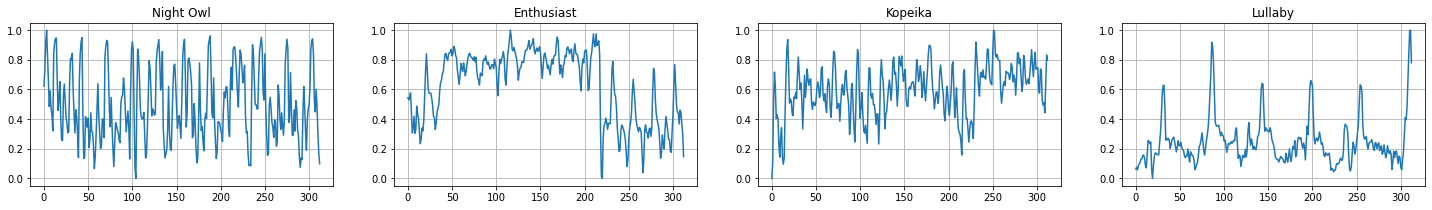

In [21]:
# Salvo le top 3 canzoni in 3 variabili 
ts1 = df.iloc[0]
ts2 = df.iloc[1]
ts3 = df.iloc[2]
ts4 = df.iloc[3]

fig = plt.figure(figsize=(25, 3)) 
fig_dims = (1,4)

plt.subplot2grid(fig_dims, (0, 0))
ts1.plot(title='Night Owl')
plt.grid()

plt.subplot2grid(fig_dims, (0, 1))
ts2.plot(title='Enthusiast')
plt.grid()

plt.subplot2grid(fig_dims, (0, 2))
ts3.plot(title='Kopeika')
plt.grid()

plt.subplot2grid(fig_dims, (0, 3))
ts4.plot(title='Lullaby')
plt.grid()

In [7]:
ts1 = ts1.values
ts2 = ts2.values
ts3 = ts3.values
ts4 = ts4.values

In [8]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts1 = scaler.fit_transform(ts1.reshape(1,-1))
ts2 = scaler.fit_transform(ts2.reshape(1,-1))
ts3 = scaler.fit_transform(ts3.reshape(1,-1))
ts4 = scaler.fit_transform(ts4.reshape(1,-1))

In [9]:
# SAX transform
n_paa_segments = 15
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)

ts1_sax = sax.fit_transform(ts1)
sax_ts1_inv = sax.inverse_transform(ts1_sax)

ts2_sax = sax.fit_transform(ts2)
sax_ts2_inv = sax.inverse_transform(ts2_sax)

ts3_sax = sax.fit_transform(ts3)
sax_ts3_inv = sax.inverse_transform(ts3_sax)

ts4_sax = sax.fit_transform(ts4)
sax_ts4_inv = sax.inverse_transform(ts4_sax)

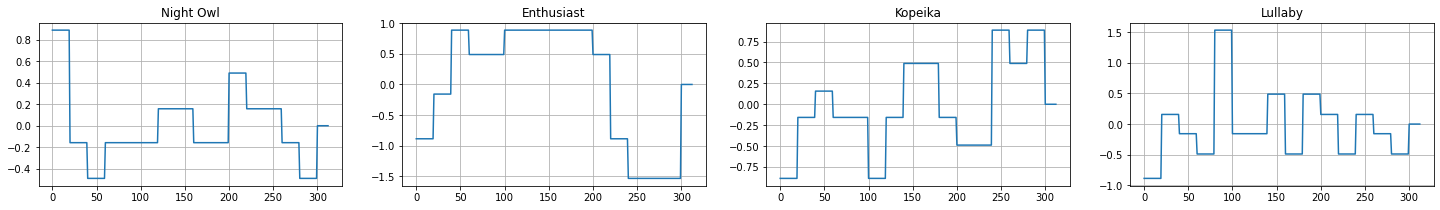

In [22]:
# Plotto le 3 time series dopo la SAX

fig = plt.figure(figsize=(25, 3)) 
fig_dims = (1,4)

plt.subplot2grid(fig_dims, (0, 0))
plt.plot(sax_ts1_inv.ravel())
plt.title('Night Owl')
plt.grid()

plt.subplot2grid(fig_dims, (0, 1))
plt.plot(sax_ts2_inv.ravel())
plt.title('Enthusiast')
plt.grid()

plt.subplot2grid(fig_dims, (0, 2))
plt.plot(sax_ts3_inv.ravel())
plt.title('Kopeika')
plt.grid()

plt.subplot2grid(fig_dims, (0, 3))
plt.plot(sax_ts4_inv.ravel())
plt.title('Lullaby')
plt.grid()

In [11]:
# Mappo i valori approssimati con le lettere e non con numeri, altrimenti non funziona la libreria per SPM

l = [chr(i) for i in range(65, 65+21)]
map_symbols1 = {k: v for v, k in zip(l, np.unique(sax_ts1_inv))}
map_symbols2 = {k: v for v, k in zip(l, np.unique(sax_ts2_inv))}
map_symbols3 = {k: v for v, k in zip(l, np.unique(sax_ts3_inv))}
map_symbols4 = {k: v for v, k in zip(l, np.unique(sax_ts4_inv))}


print(map_symbols2)

{-1.5341205443525463: 'A', -0.887146559018876: 'B', -0.1573106846101707: 'C', 0.0: 'D', 0.4887764111146695: 'E', 0.887146559018876: 'F'}


In [12]:
seq1 = np.array([map_symbols1[v] for v in sax_ts1_inv.ravel()])
seq2 = np.array([map_symbols2[v] for v in sax_ts2_inv.ravel()])
seq3 = np.array([map_symbols3[v] for v in sax_ts3_inv.ravel()])
seq4 = np.array([map_symbols4[v] for v in sax_ts4_inv.ravel()])

print(len(seq1),len(seq2),len(seq3),len(seq4))

313 313 313 313


In [13]:
db = []
it = 0
tmp = []
for i in range(0, len(seq1)):
    if it<60:
        tmp.append((seq1[i], seq2[i], seq3[i], seq4[i]))
        it = it + 1
    else:
        db.append(tmp)
        it = 1
        tmp = []
        tmp.append((seq1[i], seq2[i], seq3[i], seq4[i]))

In [14]:
lista = [(seq1[i], seq2[i], seq3[i], seq4[i]) for i in range(0, len(seq1))]
lista

[('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('F', 'B', 'A', 'A'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('B', 'C', 'C', 'E'),
 ('A', 'F', 'E', 'C'),
 ('A', 'F', 'E', 'C'),
 ('A', 'F', 'E', 'C'),
 ('A', 'F',

# Sequential Pattern Mining

https://github.com/chuanconggao/PrefixSpan-py

In [15]:
ps = PrefixSpan(lista)

In [16]:
ps.frequent(30)

[(160, ['F']),
 (40, ['F', 'B']),
 (40, ['F', 'A']),
 (100, ['F', 'C']),
 (60, ['F', 'F']),
 (220, ['B']),
 (60, ['B', 'A']),
 (40, ['B', 'A', 'C']),
 (120, ['B', 'C']),
 (80, ['B', 'E']),
 (40, ['B', 'E', 'C']),
 (60, ['B', 'B']),
 (80, ['B', 'F']),
 (60, ['B', 'F', 'C']),
 (40, ['B', 'F', 'F']),
 (120, ['A']),
 (40, ['A', 'A']),
 (40, ['A', 'F']),
 (40, ['A', 'F', 'C']),
 (40, ['A', 'E']),
 (60, ['A', 'C']),
 (40, ['A', 'G']),
 (173, ['C']),
 (40, ['C', 'C']),
 (120, ['E']),
 (60, ['E', 'C']),
 (40, ['E', 'B']),
 (60, ['G']),
 (93, ['D']),
 (40, ['D', 'F'])]

In [26]:
ps.topk(15, closed=True)

[(220, ['B']),
 (173, ['C']),
 (160, ['F']),
 (120, ['A']),
 (120, ['B', 'C']),
 (120, ['E']),
 (100, ['F', 'C']),
 (93, ['D']),
 (80, ['B', 'E']),
 (80, ['B', 'F']),
 (60, ['B', 'A']),
 (60, ['B', 'B']),
 (60, ['B', 'F', 'C']),
 (60, ['E', 'C']),
 (60, ['F', 'F'])]

In [28]:
for num, seq in ps.topk(50, closed=True):
    if len(seq) >= 3:
        print(num, seq)

60 ['B', 'F', 'C']
40 ['A', 'F', 'C']
40 ['B', 'A', 'C']
40 ['B', 'E', 'C']
40 ['B', 'F', 'F']
20 ['A', 'A', 'G', 'B']
20 ['A', 'F', 'E', 'C']
20 ['B', 'A', 'F', 'C']
20 ['B', 'C', 'C', 'E']
20 ['B', 'E', 'C', 'B']
20 ['B', 'E', 'C', 'G']
20 ['B', 'F', 'A', 'C']
20 ['B', 'F', 'C', 'F']
20 ['B', 'F', 'F', 'B']
20 ['D', 'A', 'G', 'E']
20 ['D', 'B', 'B', 'B']
20 ['D', 'F', 'C', 'C']
20 ['D', 'F', 'F', 'F']
20 ['E', 'E', 'B', 'E']
20 ['F', 'B', 'A', 'A']
13 ['C', 'D', 'D', 'D']


In [19]:
for num, seq in ps.topk(50, closed=True):
    if len(seq) == 3:
        print(num, seq)

60 ['B', 'F', 'C']
40 ['A', 'F', 'C']
40 ['B', 'A', 'C']
40 ['B', 'E', 'C']
40 ['B', 'F', 'F']
